<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Decision-Tree-Algorithm" data-toc-modified-id="Decision-Tree-Algorithm-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Decision Tree Algorithm</a></span><ul class="toc-item"><li><span><a href="#Gini-Impurity" data-toc-modified-id="Gini-Impurity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Gini Impurity</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Random-Forest-Classifier" data-toc-modified-id="Random-Forest-Classifier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Random Forest Classifier</a></span><ul class="toc-item"><li><span><a href="#Gini-Index" data-toc-modified-id="Gini-Index-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Gini Index</a></span></li><li><span><a href="#Entropy" data-toc-modified-id="Entropy-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Entropy</a></span></li></ul></li><li><span><a href="#Support-Vector-Machine" data-toc-modified-id="Support-Vector-Machine-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Support Vector Machine</a></span></li><li><span><a href="#Neural-network" data-toc-modified-id="Neural-network-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Neural network</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import pydicom
from sklearn.metrics import roc_auc_score
from copy import deepcopy
from sklearn.utils import shuffle

In [2]:
#Import the true set dataset
ts = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/TrueSet.csv')
display(ts)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,33.343689,0.504963,0.988488,0.976670,0.988266,0.604986,0.167355
1,1.0,1.0,45.0,1.0,33.761907,0.504790,0.988270,0.976184,0.988020,0.601583,0.167355
2,1.0,1.0,90.0,1.0,33.853064,0.504749,0.988630,0.976700,0.988281,0.598952,0.167355
3,1.0,1.0,135.0,1.0,33.235679,0.505928,0.988263,0.976153,0.988005,0.607793,0.167355
4,1.0,1.0,0.0,2.0,34.930887,0.526944,0.988034,0.975636,0.987743,0.587795,0.167355
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,74.172211,0.996355,0.979663,0.958999,0.979285,0.663702,0.279801
1316,4.0,58.0,0.0,3.0,82.000896,1.083436,0.978642,0.956995,0.978261,0.629656,0.279801
1317,4.0,58.0,45.0,3.0,78.950834,1.052204,0.978875,0.957253,0.978393,0.644799,0.279801
1318,4.0,58.0,90.0,3.0,83.111228,1.067657,0.978810,0.957206,0.978369,0.624641,0.279801


In [3]:
ts['Cancer'] = 1
ts.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(ts)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,33.343689,0.504963,0.988488,0.988266,0.604986,0.167355,1
1,33.761907,0.504790,0.988270,0.988020,0.601583,0.167355,1
2,33.853064,0.504749,0.988630,0.988281,0.598952,0.167355,1
3,33.235679,0.505928,0.988263,0.988005,0.607793,0.167355,1
4,34.930887,0.526944,0.988034,0.987743,0.587795,0.167355,1
...,...,...,...,...,...,...,...
1315,74.172211,0.996355,0.979663,0.979285,0.663702,0.279801,1
1316,82.000896,1.083436,0.978642,0.978261,0.629656,0.279801,1
1317,78.950834,1.052204,0.978875,0.978393,0.644799,0.279801,1
1318,83.111228,1.067657,0.978810,0.978369,0.624641,0.279801,1


In [4]:
rt = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/RTset.csv')
display(rt)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,1415.114936,24.947779,0.241535,0.045526,0.213367,0.741286,6.626737
1,1.0,1.0,45.0,1.0,1564.000000,25.687628,0.241530,0.043876,0.209466,0.714698,6.626737
2,1.0,1.0,90.0,1.0,1532.402987,25.478171,0.244650,0.045569,0.213469,0.719792,6.626737
3,1.0,1.0,135.0,1.0,1541.695932,25.508743,0.240647,0.043870,0.209452,0.718767,6.626737
4,1.0,1.0,0.0,2.0,1542.802688,25.569513,0.239216,0.043007,0.207381,0.718585,6.626737
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,1834.651211,28.511326,0.242041,0.047174,0.217197,0.557800,6.558195
1316,4.0,58.0,0.0,3.0,1952.030385,29.420547,0.234079,0.043689,0.209020,0.530348,6.558195
1317,4.0,58.0,45.0,3.0,2134.257673,30.954337,0.230794,0.043073,0.207540,0.487669,6.558195
1318,4.0,58.0,90.0,3.0,2128.131485,30.897048,0.232787,0.043805,0.209296,0.488054,6.558195


In [5]:
rt['Cancer'] = 0
rt.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(rt)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,1415.114936,24.947779,0.241535,0.213367,0.741286,6.626737,0
1,1564.000000,25.687628,0.241530,0.209466,0.714698,6.626737,0
2,1532.402987,25.478171,0.244650,0.213469,0.719792,6.626737,0
3,1541.695932,25.508743,0.240647,0.209452,0.718767,6.626737,0
4,1542.802688,25.569513,0.239216,0.207381,0.718585,6.626737,0
...,...,...,...,...,...,...,...
1315,1834.651211,28.511326,0.242041,0.217197,0.557800,6.558195,0
1316,1952.030385,29.420547,0.234079,0.209020,0.530348,6.558195,0
1317,2134.257673,30.954337,0.230794,0.207540,0.487669,6.558195,0
1318,2128.131485,30.897048,0.232787,0.209296,0.488054,6.558195,0


In [6]:
fs = pd.read_csv('/Users/rt/Desktop/College/Cancer Project/Database/FalseSet.csv')
display(fs)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,1487.686275,13.585815,0.353834,0.043022,0.207417,0.743113,5.639273
1,1.0,1.0,45.0,1.0,1803.507820,16.709327,0.334732,0.041388,0.203441,0.689746,5.639273
2,1.0,1.0,90.0,1.0,1690.679504,15.470895,0.360299,0.043114,0.207640,0.708052,5.639273
3,1.0,1.0,135.0,1.0,1819.934917,16.615609,0.336151,0.041380,0.203421,0.686921,5.639273
4,1.0,1.0,0.0,2.0,1810.637226,16.508658,0.338136,0.040618,0.201540,0.688505,5.639273
...,...,...,...,...,...,...,...,...,...,...,...
391,4.0,14.0,135.0,2.0,3148.123706,27.531995,0.269034,0.039956,0.199891,0.575695,6.745025
392,4.0,14.0,0.0,3.0,3600.945312,31.245368,0.257491,0.037084,0.192571,0.515679,6.745025
393,4.0,14.0,45.0,3.0,4001.138400,34.395948,0.247689,0.036361,0.190687,0.463251,6.745025
394,4.0,14.0,90.0,3.0,4217.862648,35.971375,0.245831,0.037136,0.192707,0.432895,6.745025


In [7]:
fs['Cancer'] = 0
fs.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)
display(fs)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy,Cancer
0,1487.686275,13.585815,0.353834,0.207417,0.743113,5.639273,0
1,1803.507820,16.709327,0.334732,0.203441,0.689746,5.639273,0
2,1690.679504,15.470895,0.360299,0.207640,0.708052,5.639273,0
3,1819.934917,16.615609,0.336151,0.203421,0.686921,5.639273,0
4,1810.637226,16.508658,0.338136,0.201540,0.688505,5.639273,0
...,...,...,...,...,...,...,...
391,3148.123706,27.531995,0.269034,0.199891,0.575695,6.745025,0
392,3600.945312,31.245368,0.257491,0.192571,0.515679,6.745025,0
393,4001.138400,34.395948,0.247689,0.190687,0.463251,6.745025,0
394,4217.862648,35.971375,0.245831,0.192707,0.432895,6.745025,0


In [8]:
df = pd.concat([ts, fs, rt])
df = shuffle(df)
y = df['Cancer'].values.tolist()
df.reset_index(inplace = True, drop = True)
df.drop(columns = ['Cancer'], inplace = True)

In [9]:
display(df)

,Contrast,Dissimilarities,Homogeneity,Energy,Correlation,Entropy
0,17.852130,0.227912,0.995717,0.995645,0.549811,0.052671
1,11.644670,0.182343,0.994573,0.994349,0.247504,0.068561
2,152.233479,2.077260,0.956708,0.955766,0.683577,0.547319
3,1945.659863,29.326056,0.239174,0.214526,0.536319,6.534167
4,2235.917660,31.927171,0.248081,0.227708,0.492279,6.484091
...,...,...,...,...,...,...
3031,152.853959,2.091698,0.956180,0.955252,0.683485,0.547319
3032,2011.909158,29.926567,0.260647,0.238552,0.530264,6.457354
3033,140.171041,1.835999,0.963757,0.963038,0.637461,0.461230
3034,27.954453,0.355206,0.993498,0.993361,0.588867,0.080518


In [10]:
print(y)

[1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 

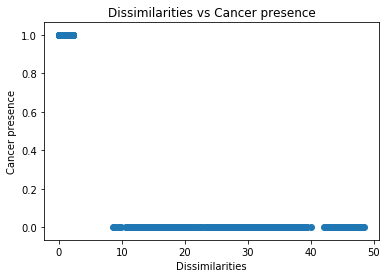

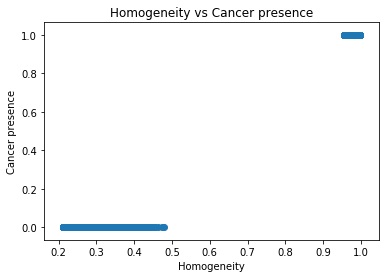

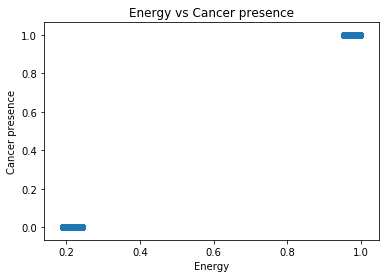

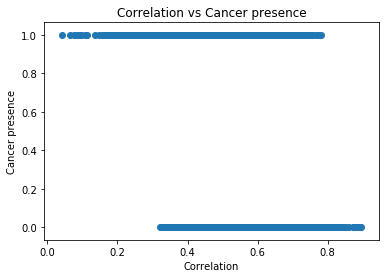

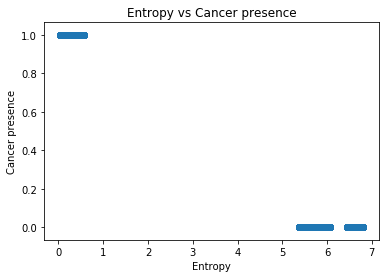

In [11]:
temp = df.columns.values.tolist()
del temp[0]
for i in temp:
    x = df[i]
    plt.scatter(x, y)
    plt.xlabel(i)
    plt.ylabel('Cancer presence')
    plt.title('%s vs Cancer presence'%i)
    plt.show()

# Data Preprocessing

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=0)

In [14]:
print(x_test)

         Contrast  Dissimilarities  Homogeneity    Energy  Correlation  \
1013  1134.401590        15.278334     0.393231  0.201700     0.767418   
794   2077.693118        30.469035     0.258613  0.237353     0.511587   
1412    97.523684         1.356545     0.971588  0.970934     0.622107   
1880     7.537623         0.106250     0.997579  0.997518     0.608116   
263   1790.697578        27.745513     0.236195  0.205916     0.655143   
...           ...              ...          ...       ...          ...   
2895    11.991449         0.147666     0.997211  0.997170     0.570964   
2300    37.632972         0.553787     0.987617  0.987390     0.699427   
1158  1108.853395        16.866959     0.286445  0.201539     0.744888   
1263   796.287674        12.331196     0.340088  0.208444     0.831974   
1044   142.675704         1.931664     0.960678  0.959780     0.644140   

       Entropy  
1013  5.567068  
794   6.466622  
1412  0.378459  
1880  0.036021  
263   6.651548  
...      

# Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
model = LogisticRegression(solver = 'liblinear', C = 0.05, 
                           multi_class = 'ovr', random_state = 0)

In [17]:
model.fit(x_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = model.predict(x_test)

In [19]:
# accuracy on training set
model.score(x_train, y_train)

1.0

In [20]:
# Accuracy on testing set
model.score(x_test, y_test)

1.0

In [21]:
confusion_matrix(y_test, y_pred)

array([[524,   0],
       [  0, 387]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       387

    accuracy                           1.00       911
   macro avg       1.00      1.00      1.00       911
weighted avg       1.00      1.00      1.00       911



# Decision Tree Algorithm

## Gini Impurity

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [24]:
decision_tree = DecisionTreeClassifier()

In [25]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [26]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

Model accuracy :  1.0


[Text(465.0, 679.5, 'X[1] <= 5.453\ngini = 0.493\nsamples = 2125\nvalue = [1192, 933]'),
 Text(232.5, 226.5, 'gini = 0.0\nsamples = 933\nvalue = [0, 933]'),
 Text(697.5, 226.5, 'gini = 0.0\nsamples = 1192\nvalue = [1192, 0]')]

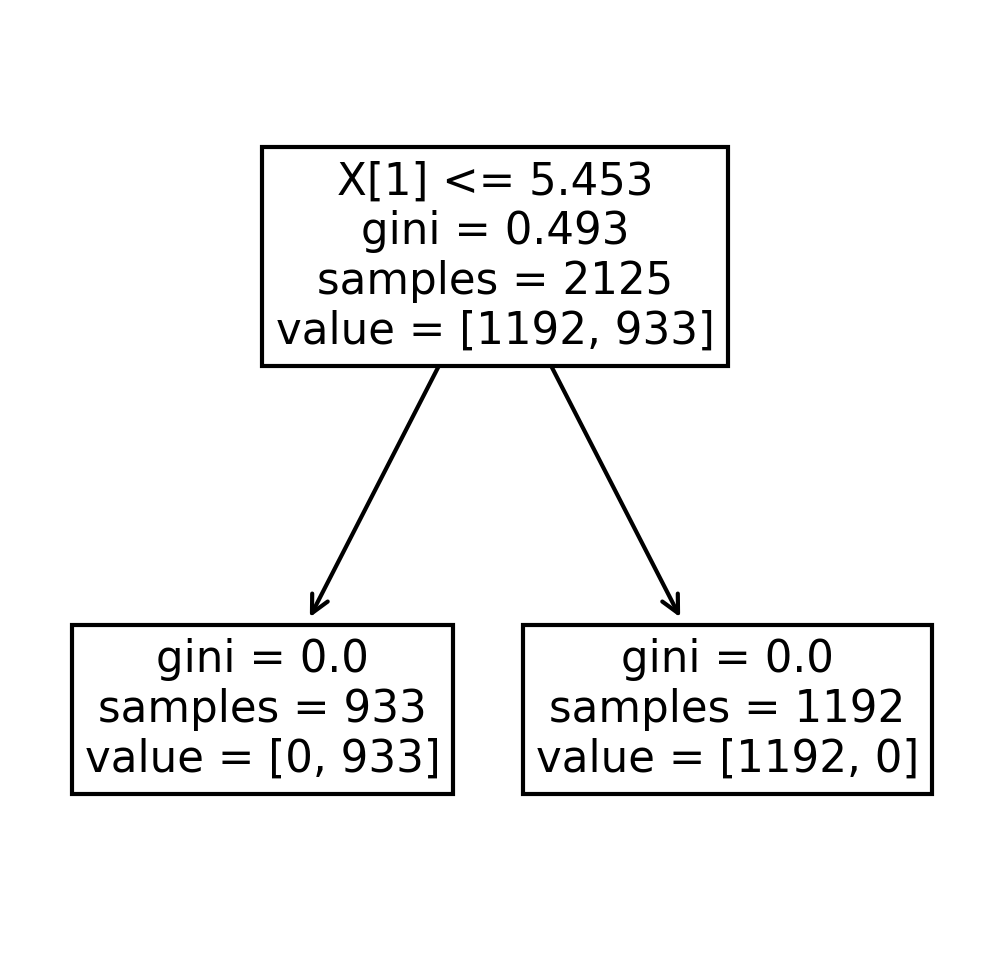

In [27]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [28]:
val = decision_tree.predict(x_test)

In [29]:
print('Predicted Values : ', val)
print('Original Values : ', y_test)

Predicted Values :  [0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 

In [30]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

Accuracy on testing data :  1.0


In [31]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

Confusion Matrix : 
[[524   0]
 [  0 387]]


## Entropy

In [32]:
decision_tree = DecisionTreeClassifier(criterion = 'entropy')

In [33]:
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [34]:
print('Model accuracy : ', decision_tree.score(x_train, y_train))

Model accuracy :  1.0


[Text(465.0, 679.5, 'X[3] <= 0.598\nentropy = 0.989\nsamples = 2125\nvalue = [1192, 933]'),
 Text(232.5, 226.5, 'entropy = 0.0\nsamples = 1192\nvalue = [1192, 0]'),
 Text(697.5, 226.5, 'entropy = 0.0\nsamples = 933\nvalue = [0, 933]')]

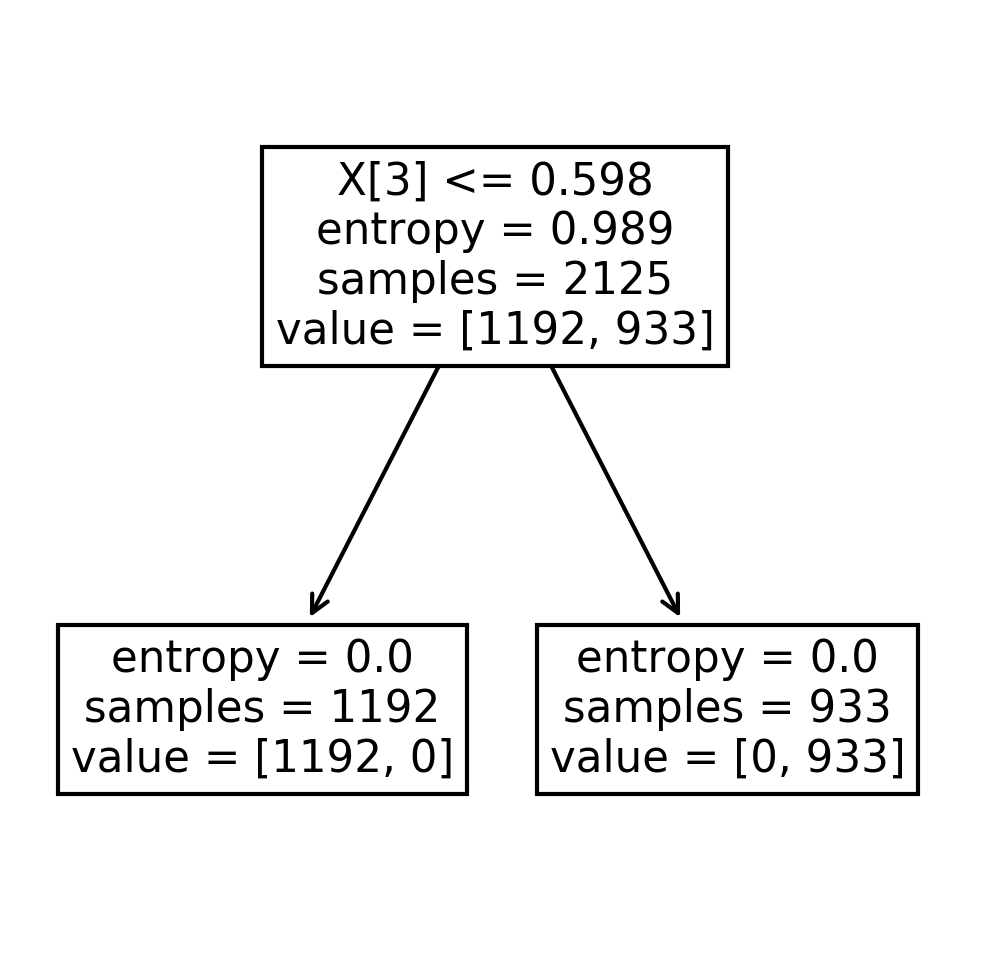

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(decision_tree)

In [36]:
val = decision_tree.predict(x_test)
print('Predicted Values : ', val)
print('Original Values : ', y_test)

Predicted Values :  [0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 

In [37]:
print('Accuracy on testing data : ',decision_tree.score(x_test, y_test))

Accuracy on testing data :  1.0


In [38]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, val))

Confusion Matrix : 
[[524   0]
 [  0 387]]


# Random Forest Classifier

## Gini Index

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
random_forest = RandomForestClassifier(criterion = 'gini',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [41]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

Accuracy on testing data :  1.0


In [43]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

Confusion matrix : 
[[524   0]
 [  0 387]]


## Entropy

In [44]:
random_forest = RandomForestClassifier(criterion = 'entropy',
                                       n_estimators = 100, 
                                       bootstrap = True,
                                       max_features = 'sqrt')

In [45]:
random_forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [46]:
print('Accuracy on testing data : ', random_forest.score(x_test, y_test))

Accuracy on testing data :  1.0


In [47]:
val = random_forest.predict(x_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, val))

Confusion matrix : 
[[524   0]
 [  0 387]]


# Support Vector Machine

In [48]:
from sklearn.svm import SVC

In [49]:
svm = SVC(kernel = 'poly')

In [50]:
svm.fit(x_train, y_train)

/Users/rt/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [51]:
print('Predicted values for SVM Classifier : ',svm.predict(x_test))

Predicted values for SVM Classifier :  [0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 1
 0 0 0 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 1
 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 1 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0 1 1 0
 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 0 0
 0 0 1 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 1
 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 

In [52]:
print('Accuracy of Support Vector Machine : ', svm.score(x_test, y_test))

Accuracy of Support Vector Machine :  1.0


# Neural network

In [53]:
from keras import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [54]:
classifier = Sequential()

In [55]:
classifier.add(Dense(6, activation = 'relu', 
                     kernel_initializer = 'random_normal', 
                     input_dim = 6))

In [56]:
classifier.add(Dense(6, activation = 'relu',
                    kernel_initializer = 'random_normal'))

In [57]:
classifier.add(Dense(1, activation = 'sigmoid',
                    kernel_initializer = 'random_normal'))

In [58]:
classifier.compile(optimizer = 'adam',
                   loss = 'binary_crossentropy',
                   metrics = ['accuracy'])

In [59]:
classifier.fit(x_train, y_train, batch_size = 5, epochs = 100)

Epoch 1/100
2125/2125 [==============================] - 1s 520us/step - loss: 0.6905 - accuracy: 0.5609
Epoch 2/100
2125/2125 [==============================] - 1s 269us/step - loss: 0.6876 - accuracy: 0.5609
Epoch 3/100
2125/2125 [==============================] - 1s 268us/step - loss: 0.6865 - accuracy: 0.5609
Epoch 4/100
2125/2125 [==============================] - 1s 268us/step - loss: 0.6861 - accuracy: 0.5609
Epoch 5/100
2125/2125 [==============================] - 1s 267us/step - loss: 0.6859 - accuracy: 0.5609
Epoch 6/100
2125/2125 [==============================] - 1s 267us/step - loss: 0.6858 - accuracy: 0.5609
Epoch 7/100
2125/2125 [==============================] - 1s 268us/step - loss: 0.6858 - accuracy: 0.5609
Epoch 8/100
2125/2125 [==============================] - 1s 267us/step - loss: 0.6858 - accuracy: 0.5609
Epoch 9/100
2125/2125 [==============================] - 1s 267us/step - loss: 0.6859 - accuracy: 0.5609
Epoch 10/100
2125/2125 [==============================]

In [60]:
model_eval = classifier.evaluate(x_train, y_train)

2125/2125 [==============================] - 0s 57us/step


In [61]:
print('Accuracy on training set : ', 
      classifier.evaluate(x_train, y_train)[1])
print()
print('Accuracy on Testing set : ', 
      classifier.evaluate(x_train, y_train)[0])

2125/2125 [==============================] - 0s 17us/step
Accuracy on training set :  0.5609411597251892

2125/2125 [==============================] - 0s 16us/step
Accuracy on Testing set :  0.6857011385244481


In [62]:
y_pred = classifier.predict(x_test)

In [63]:
y_pred = [1 if i > 0.5 else 0 for i in y_pred]

In [64]:
print('Confusion Matrix : ')
print(confusion_matrix(y_test, y_pred))

Confusion Matrix : 
[[524   0]
 [387   0]]


In [69]:
display(fts)

,Patient_id,Slice_id,Angles,Distance,Contrast,Dissimilarities,Homogeneity,ASM,Energy,Correlation,Entropy
0,1.0,1.0,0.0,1.0,4064.928018,37.291161,0.230484,0.041462,0.203623,0.547081,6.711178
1,1.0,1.0,45.0,1.0,4440.675110,39.541330,0.230108,0.039953,0.199882,0.506535,6.711178
2,1.0,1.0,90.0,1.0,4335.002512,39.222794,0.232505,0.041465,0.203630,0.516879,6.711178
3,1.0,1.0,135.0,1.0,4424.382514,39.475755,0.229090,0.039934,0.199836,0.508345,6.711178
4,1.0,1.0,0.0,2.0,4347.037755,38.815591,0.228018,0.039246,0.198105,0.516992,6.711178
...,...,...,...,...,...,...,...,...,...,...,...
1315,4.0,58.0,135.0,2.0,4306.086736,40.169719,0.223799,0.039942,0.199855,0.386690,6.728915
1316,4.0,58.0,0.0,3.0,4531.744395,41.587373,0.216778,0.037082,0.192568,0.356141,6.728915
1317,4.0,58.0,45.0,3.0,4853.396863,43.779125,0.213272,0.036377,0.190728,0.312494,6.728915
1318,4.0,58.0,90.0,3.0,4893.647002,44.080086,0.214821,0.037164,0.192779,0.304897,6.728915


In [68]:
fts = pd.read_csv('/Users/rt/Desktop/FullTrueSet.csv')

In [70]:
fts.drop(columns = ['Patient_id', 'Slice_id', 'Angles', 'Distance', 'ASM'], inplace = True)

In [72]:
fts['Cancer'] = 1

In [74]:
y = fts['Cancer']
fts.drop(columns = ['Cancer'], inplace = True)